In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

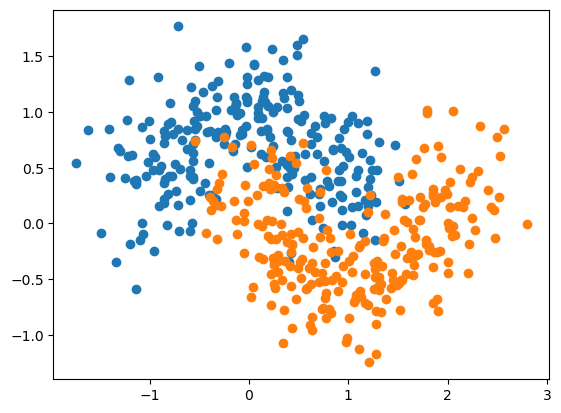

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 不同的分类方法

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.864

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.896

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=666)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.864

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

## Hard Voting

In [9]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [10]:
y_predict[:10]

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.904

## 使用Voting Classify

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

In [13]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904